# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")


# **Importing Dataset**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/Datasets/ipl_data.csv")
data

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


# **EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [4]:
data.isnull().sum()

,0
mid,0
date,0
venue,0
bat_team,0
bowl_team,0
batsman,0
bowler,0
runs,0
wickets,0
overs,0


In [5]:
data.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
count,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000,76014.000000
mean,308.627740,74.889349,2.415844,9.783068,33.216434,1.120307,24.962283,8.869287,160.901452
std,178.156878,48.823327,2.015207,5.772587,14.914174,1.053343,20.079752,10.795742,29.246231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
25%,154.000000,34.000000,1.000000,4.600000,24.000000,0.000000,10.000000,1.000000,142.000000
50%,308.000000,70.000000,2.000000,9.600000,34.000000,1.000000,20.000000,5.000000,162.000000
75%,463.000000,111.000000,4.000000,14.600000,43.000000,2.000000,35.000000,13.000000,181.000000
max,617.000000,263.000000,10.000000,19.600000,113.000000,7.000000,175.000000,109.000000,263.000000


In [6]:
bat_team_counts = data["bat_team"].value_counts()
bowl_team_counts = data["bowl_team"].value_counts()

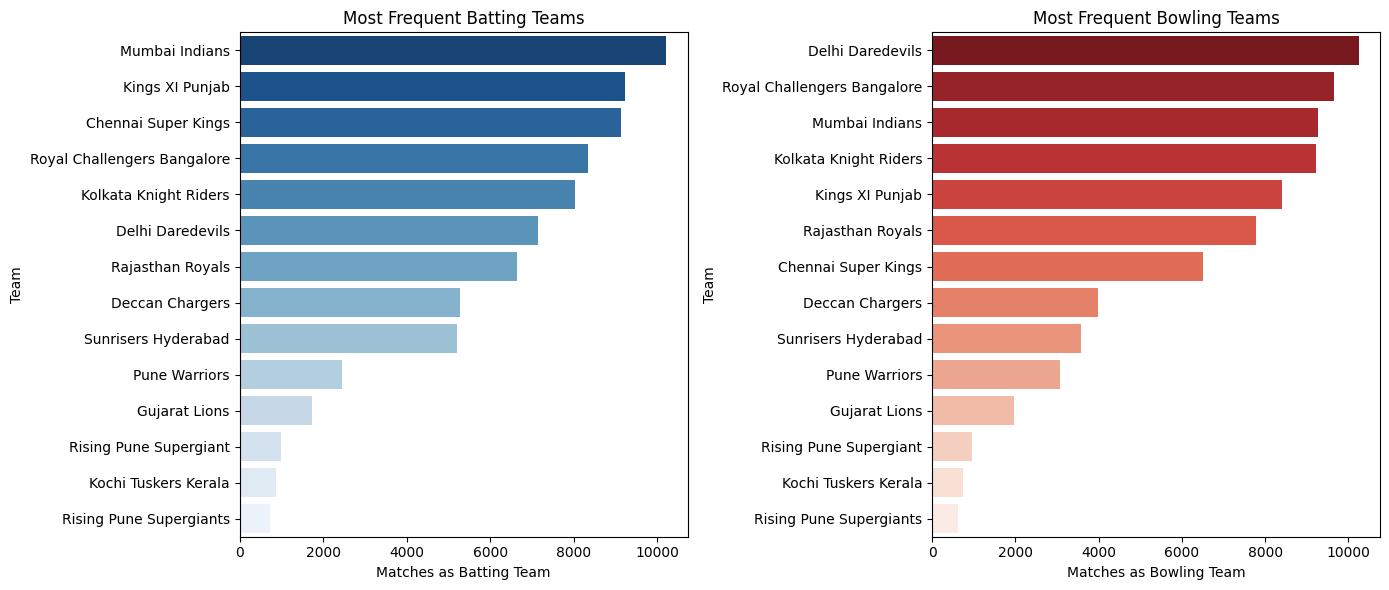

In [7]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(y=bat_team_counts.index, x=bat_team_counts.values,hue=bat_team_counts.index,legend=False,palette="Blues_r")
plt.title("Most Frequent Batting Teams")
plt.xlabel("Matches as Batting Team")
plt.ylabel("Team")


plt.subplot(1, 2, 2)
sns.barplot(y=bowl_team_counts.index, x=bowl_team_counts.values, palette="Reds_r",hue=bowl_team_counts.index,legend=False)
plt.title("Most Frequent Bowling Teams")
plt.xlabel("Matches as Bowling Team")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [ ]:
team_runs = data.groupby("bat_team")["runs"].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette="coolwarm")
plt.title("Total Runs Scored by Each Team")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.show()

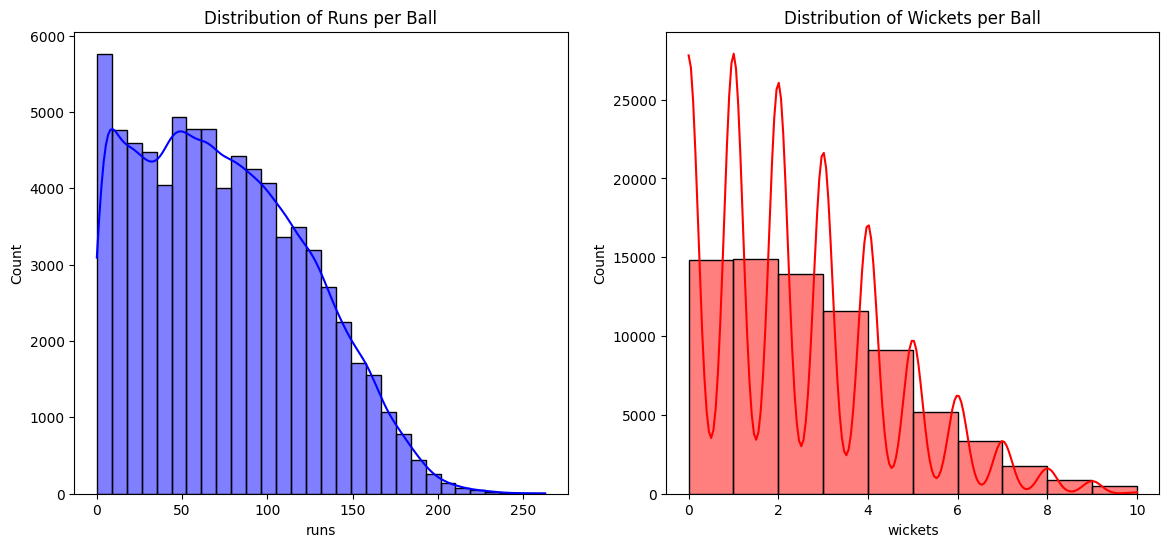

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(data["runs"], bins=30, kde=True, color="blue")
plt.title("Distribution of Runs per Ball")

plt.subplot(1, 2, 2)
sns.histplot(data["wickets"], bins=10, kde=True, color="red")
plt.title("Distribution of Wickets per Ball")

plt.show()

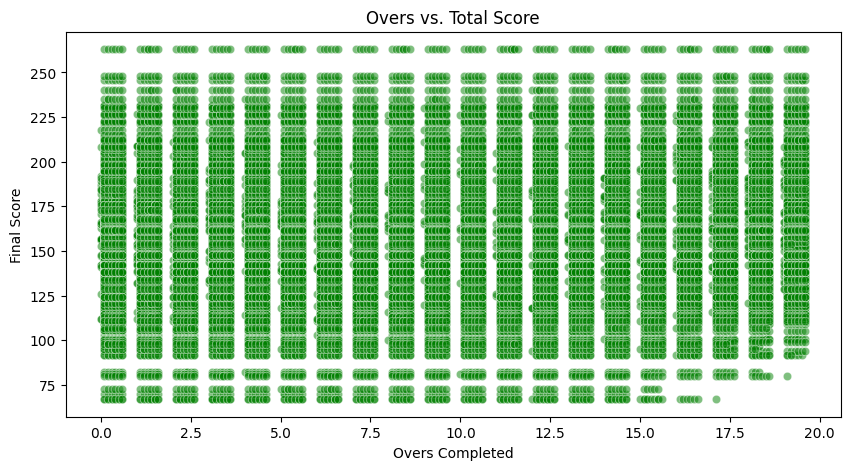

In [9]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x=data["overs"], y=data["total"], alpha=0.5, color="green")
plt.title("Overs vs. Total Score")
plt.xlabel("Overs Completed")
plt.ylabel("Final Score")
plt.show()

In [ ]:
batsman_performance = data.groupby("batsman")["runs"].sum().sort_values(ascending=False).head(10)
bowler_performance = data.groupby("bowler")["wickets"].sum().sort_values(ascending=False).head(10)


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=batsman_performance.values, y=batsman_performance.index, ax=ax[0], palette="Blues_r")
ax[0].set_title("Top 10 Batsmen by Total Runs")
ax[0].set_xlabel("Total Runs")
ax[0].set_ylabel("Batsman")

sns.barplot(x=bowler_performance.values, y=bowler_performance.index, ax=ax[1], palette="Reds_r")
ax[1].set_title("Top 10 Bowlers by Wickets Taken")
ax[1].set_xlabel("Total Wickets")
ax[1].set_ylabel("Bowler")
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [10]:
data=data.drop(['date', 'mid', 'striker', 'non-striker','batsman','bowler','runs','wickets_last_5'], axis =1)

In [11]:
data.head()

,venue,bat_team,bowl_team,wickets,overs,runs_last_5,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0,0.1,1,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0,0.2,1,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0,0.2,2,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0,0.3,2,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,0,0.4,2,222


In [12]:
categorical_columns = ["venue", "bat_team", "bowl_team"]


In [13]:
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_data = onehot_encoder.fit_transform(data[categorical_columns])
categorical_df = pd.DataFrame(categorical_data, columns=onehot_encoder.get_feature_names_out())


In [14]:
data = data.drop(columns=categorical_columns).reset_index(drop=True)
data = pd.concat([data, categorical_df], axis=1)


In [15]:
data

,wickets,overs,runs_last_5,total,venue_Brabourne Stadium,venue_Buffalo Park,venue_De Beers Diamond Oval,venue_Dr DY Patil Sports Academy,venue_Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,venue_Dubai International Cricket Stadium,...,bowl_team_Kings XI Punjab,bowl_team_Kochi Tuskers Kerala,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Pune Warriors,bowl_team_Rajasthan Royals,bowl_team_Rising Pune Supergiant,bowl_team_Rising Pune Supergiants,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
0,0,0.1,1,222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.2,1,222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.2,2,222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.3,2,222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.4,2,222,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,7,19.2,40,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76010,7,19.3,46,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76011,7,19.4,47,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
76012,7,19.5,48,129,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [16]:
scaler = MinMaxScaler()
numerical_features = ['wickets', 'overs', 'runs_last_5']
numerical_data= scaler.fit_transform(data[numerical_features])


# **train-test-split**

In [17]:
X = data.drop(columns=["total"],axis=1)
y = data["total"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((60811, 63), (15203, 63), (60811,), (15203,))

In [20]:
X_train = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60811, 1, 63), (15203, 1, 63), (60811,), (15203,))

# **Model Training & Evaluation(DL Approach)**

In [22]:
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.3),
    LSTM(50, return_sequences=False),
    Dropout(0.3),
    Dense(25, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,101 (379.30 KB)

 Trainable params: 97,101 (379.30 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 8590.5996 - val_loss: 843.8572
Epoch 2/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1073.3323 - val_loss: 640.8754
Epoch 3/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 760.5593 - val_loss: 493.1004
Epoch 4/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 683.6072 - val_loss: 427.4587
Epoch 5/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 611.0959 - val_loss: 378.5517
Epoch 6/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 557.7264 - val_loss: 340.0540
Epoch 7/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 508.9993 - val_loss: 312.2441
Epoch 8/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 463.6985 - val_loss: 297.0414
Epoch 9/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 423.5183 - val_loss: 281.0016
Epoch 10/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 389.9298 - val_loss: 255.0697
Epoch 11/100
1901/1901 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step 

In [24]:
predictions = model.predict(X_test)


476/476 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 10.143247385788088
R² Score: 0.8780243396759033


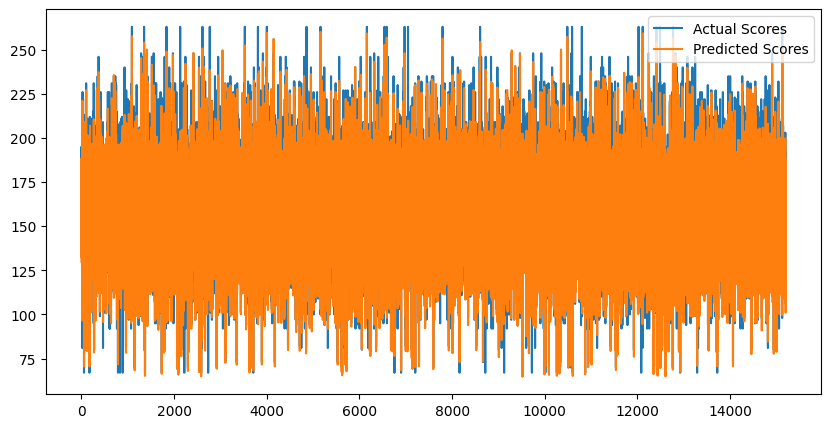

In [26]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Scores')
plt.plot(predictions, label='Predicted Scores')
plt.legend()
plt.show()


# **Model Deployment**

In [27]:
model.save("lstm_model.h5")
print("Model saved successfully as lstm_model.h5")

Model saved successfully as lstm_model.h5


In [28]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(onehot_encoder, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [29]:
!pip install streamlit --quiet

In [30]:
%%writefile app.py
import streamlit as st
import pickle
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
import pandas as pd

def load_lstm_model():
    return load_model("lstm_model.h5")

model = load_lstm_model()

def load_encoder():
    with open('encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)
    return encoder

def load_scaler():
    with open('scaler.pkl', 'rb') as f:
        scaler = pickle.load(f)
    return scaler

encoder = load_encoder()
scaler = load_scaler()

st.title("🏏 IPL Score Prediction App")
teams = ["Mumbai Indians", "Chennai Super Kings", "Royal Challengers Bangalore", "Kolkata Knight Riders", "Sunrisers Hyderabad", "Delhi Daredevils", "Pune Warriors", "Rajasthan Royals", "Gujarat Lions","Rising Pune Supergiant","Kings XI Punjab","Deccan Chargers","Kochi Tuskers Kerala","Rising Pune Supergiants"]
venues = ["Wankhede Stadium", "M Chinnaswamy Stadium", "Eden Gardens","MA Chidambaram Stadium, Chepauk", "Rajiv Gandhi International Stadium, Uppal","Punjab Cricket Association Stadium, Mohali","Feroz Shah Kotla","Sawai Mansingh Stadium","Dr DY Patil Sports Academy","Newlands","St George's Park","Kingsmead","SuperSport Park","New Wanderers Stadium","Brabourne Stadium","Sardar Patel Stadium, Motera","Barabati Stadium","Vidarbha Cricket Association Stadium, Jamtha","Himachal Pradesh Cricket Association Stadium","Nehru Stadium","Holkar Cricket Stadium","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium","Shaheed Veer Narayan Singh International Stadium","JSCA International Stadium Complex","Sheikh Zayed Stadium","Sharjah Cricket Stadium","Dubai International Cricket Stadium","Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium","Maharashtra Cricket Association Stadium","Saurashtra Cricket Association Stadium","Green Park"]

bowl_teams=teams.copy()

team = st.selectbox("Select Batting Team",teams )
bowl_team = st.selectbox("Select Bowling Team", bowl_teams)
venue = st.selectbox("Select Venue",venues)
over = st.number_input("Enter Over Number", min_value=1, max_value=20, step=1)
wickets = st.number_input("Enter Wickets Fallen", min_value=0, max_value=10, step=1)
runs_last_5 = st.number_input("Enter Runs Scored in Last 5 Overs", min_value=0, step=1)



if st.button("Predict Score"):
    input_data = pd.DataFrame([[team,bowl_team, venue, over, wickets, runs_last_5]],
                            columns=["bat_team","bowl_team","venue", "overs", "wickets", "runs_last_5"])

    categorical_features = input_data[["venue", "bat_team","bowl_team"]]
    encoded_features = encoder.transform(categorical_features)
    try:
        encoded_features = encoded_features.toarray()
    except AttributeError:
        pass

    numerical_features = input_data[["wickets","overs","runs_last_5"]].values
    scaled_features = scaler.transform(numerical_features)

    full_features = np.concatenate([encoded_features, scaled_features], axis=1)
    lstm_input = full_features.reshape((1, 1, full_features.shape[1]))

    prediction = model.predict(lstm_input)
    st.write(f"Predicted Final Score: {prediction[0][0]:.2f}")


Overwriting app.py


In [32]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.67.8:8501

your url is: https://beige-symbols-buy.loca.lt
2025-03-25 09:14:44.191968: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742894084.235176   57966 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742894084.250167   57966 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
y
2025-03-25 09:14:50.574367: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.